Starting Comprehensive Quantum vs Classical Algorithm Analysis

Analyzing Search Algorithms...
Analyzing Factorization Algorithms...
Creating Comparison Visualizations...
Generating Summary Analysis...

ALGORITHM COMPARISON SUMMARY
                    Algorithm Type             Time Complexity           Space Complexity Quantum Advantage      Practical Limitations           Best Use Case
                   Search - Linear                        O(N)                       O(1)         Quadratic                       None          Small datasets
                   Search - Binary                    O(log N)                       O(1)             None*       Requires sorted data         Sorted datasets
         Search - Quantum (Grover)                       O(√N)                   O(log N)         Reference NISQ noise, limited qubits     Unstructured search
    Factorization - Trial Division                       O(√N)                       O(1)       Exponential     Slow for large numbe

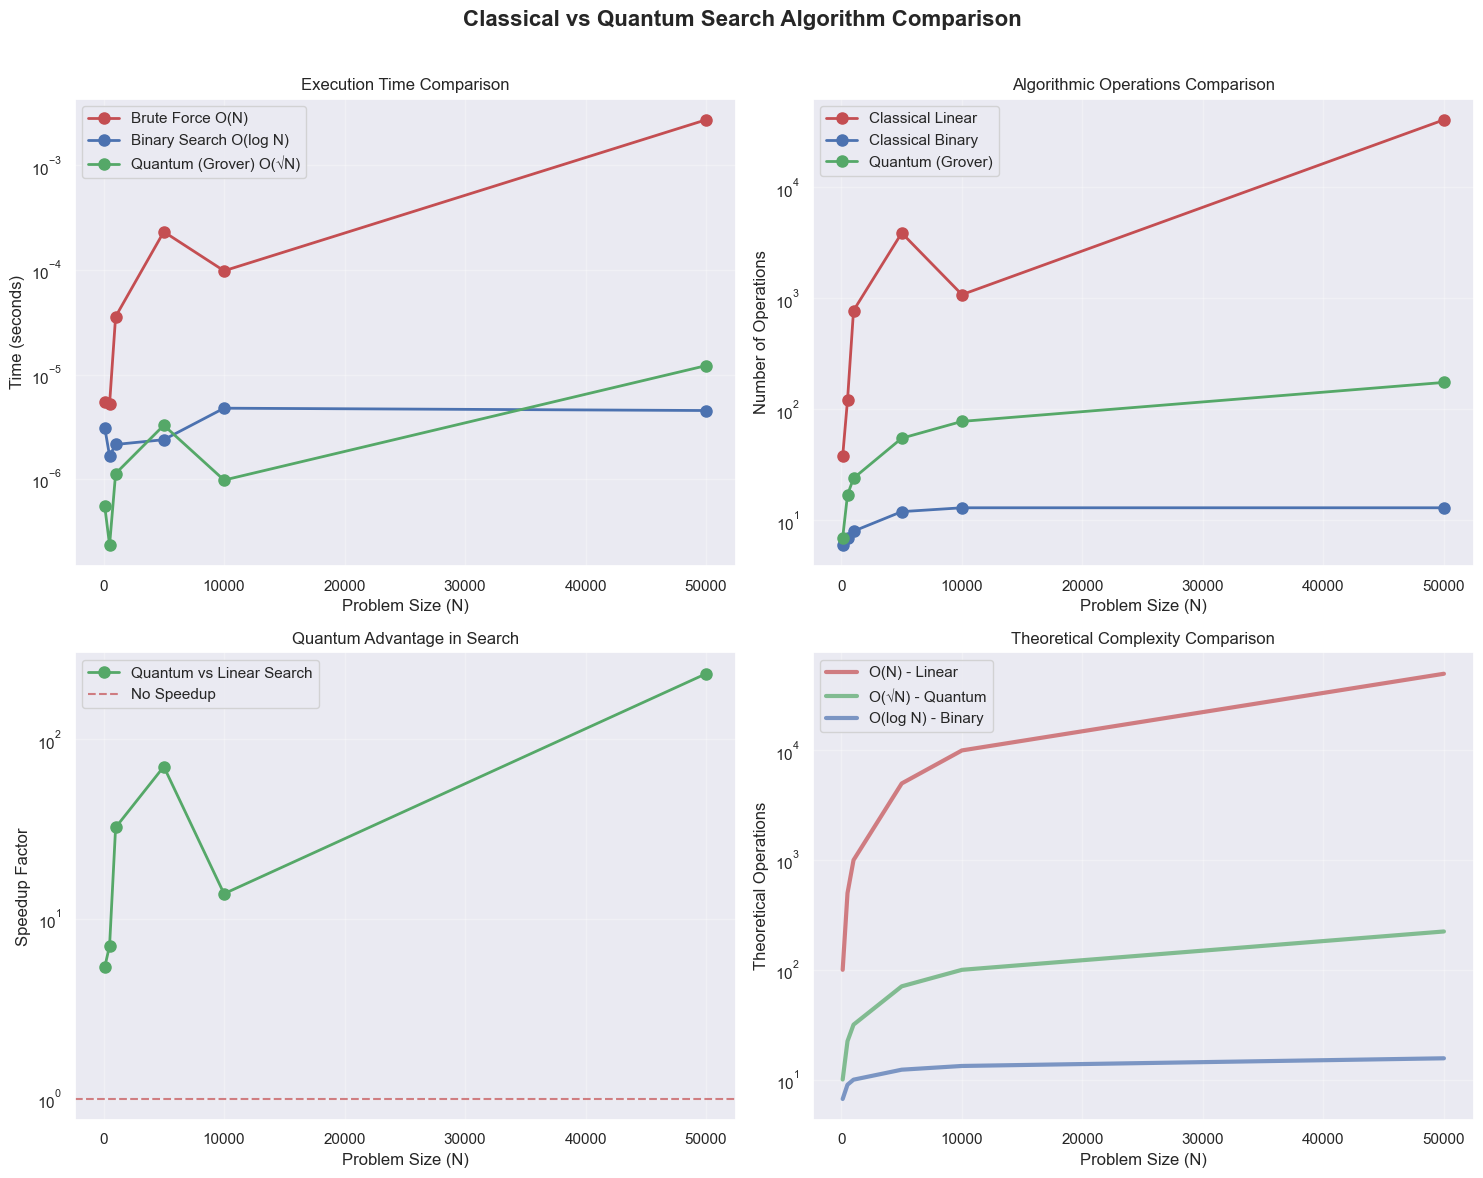

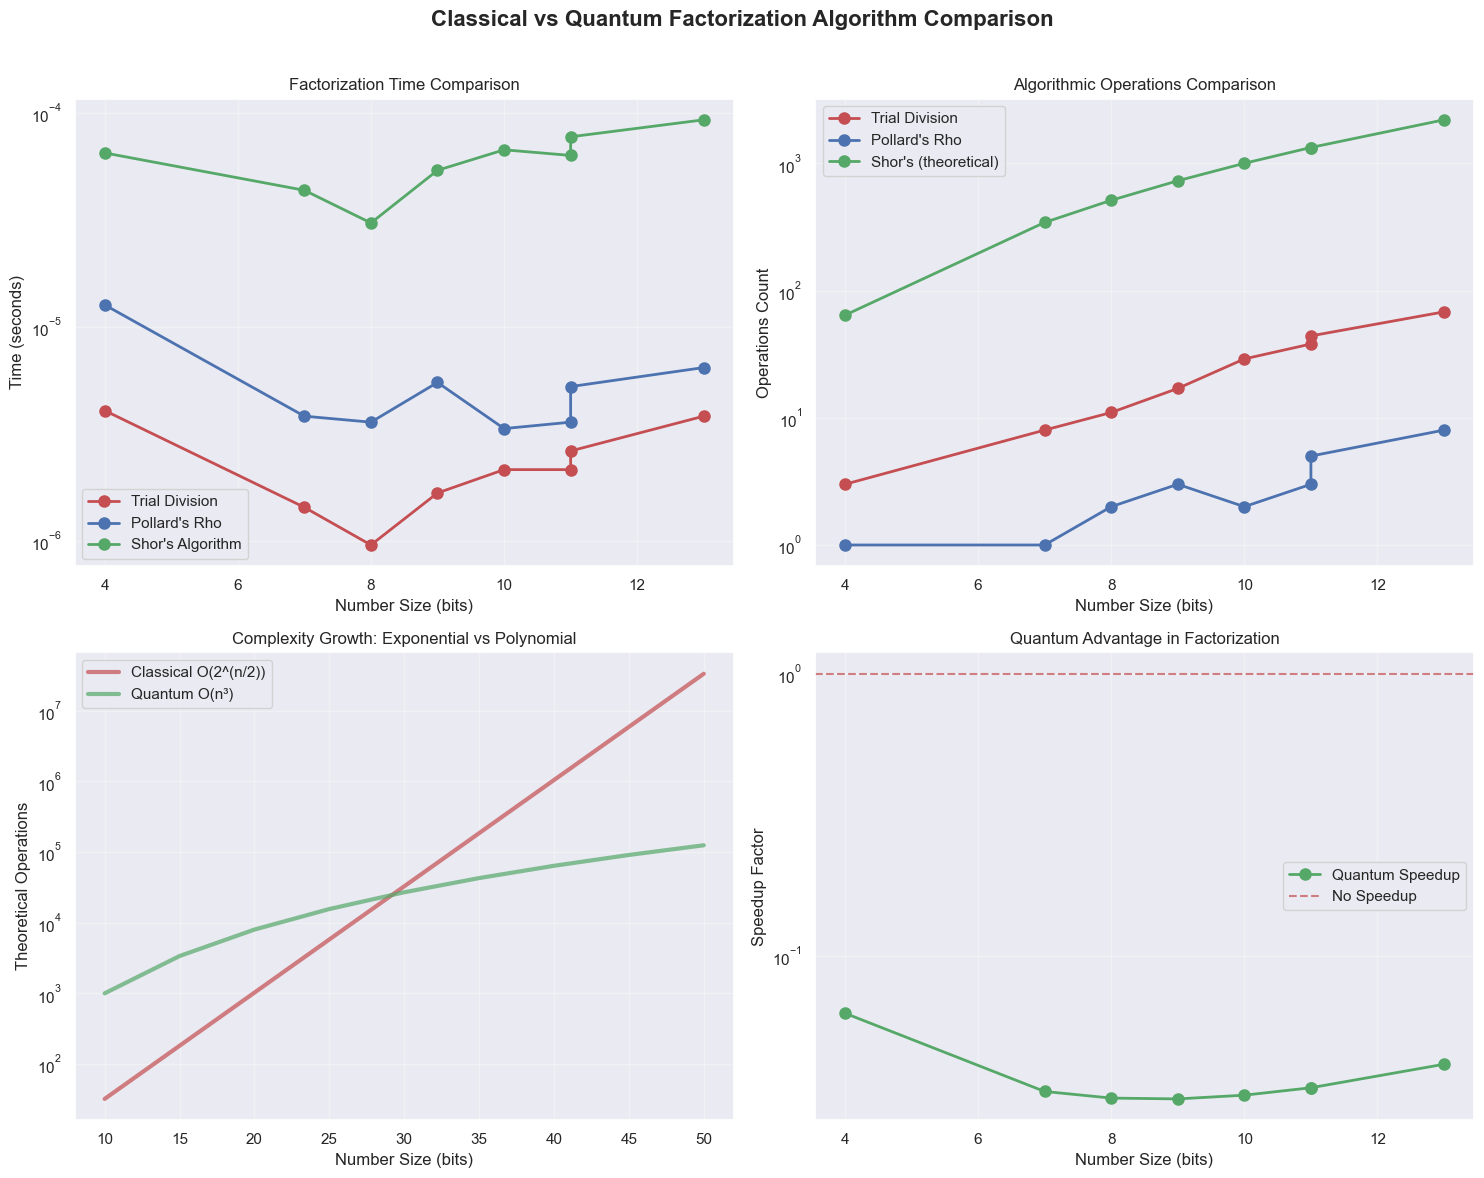

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from typing import Dict, List, Tuple
import time
import math
import random

# Set seaborn styling for all plots (Jupyter-safe)
sns.set_theme(style="darkgrid")

class QuantumClassicalComparison:
    """
    Comprehensive comparison between quantum and classical algorithms
    including theoretical analysis and empirical benchmarking
    """

    def __init__(self):
        self.comparison_data = {}

    def simulate_quantum_search_advantage(self, sizes: List[int]) -> Dict:
        """
        Simulate Grover's algorithm advantage over classical search
        Grover's: O(√N) vs Classical: O(N)
        """
        results = {
            'sizes': sizes,
            'classical_operations': [],
            'quantum_operations': [],
            'speedup_factor': []
        }

        for n in sizes:
            classical_ops = n // 2
            quantum_ops = int((math.pi / 4) * math.sqrt(n))
            speedup = classical_ops / quantum_ops if quantum_ops > 0 else 1

            results['classical_operations'].append(classical_ops)
            results['quantum_operations'].append(quantum_ops)
            results['speedup_factor'].append(speedup)

        return results

    def simulate_quantum_factorization_advantage(self, bit_lengths: List[int]) -> Dict:
        """
        Simulate Shor's algorithm advantage over classical factorization
        Shor's: O((log N)³) vs Classical: O(2^(bits/2))
        """
        results = {
            'bit_lengths': bit_lengths,
            'classical_operations': [],
            'quantum_operations': [],
            'speedup_factor': []
        }

        for bits in bit_lengths:
            classical_ops = 2 ** (bits / 2)
            quantum_ops = bits ** 3
            speedup = classical_ops / quantum_ops if quantum_ops > 0 else 1

            results['classical_operations'].append(classical_ops)
            results['quantum_operations'].append(quantum_ops)
            results['speedup_factor'].append(speedup)

        return results

    def create_search_comparison_plots(self, classical_results: Dict, quantum_simulation: Dict):
        """Create comprehensive plots comparing search algorithms"""

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Classical vs Quantum Search Algorithm Comparison', fontsize=16, fontweight='bold')

        sizes = classical_results['sizes']
        bf_times = [r['time'] for r in classical_results['brute_force']]
        bs_times = [r['time'] for r in classical_results['binary_search']]

        # Plot 1: Time Complexity Comparison
        ax1.plot(sizes, bf_times, 'ro-', label='Brute Force O(N)', linewidth=2, markersize=8)
        ax1.plot(sizes, bs_times, 'bo-', label='Binary Search O(log N)', linewidth=2, markersize=8)
        quantum_times = [t * math.sqrt(s) / s if s != 0 else 0 for t, s in zip(bf_times, sizes)]
        ax1.plot(sizes, quantum_times, 'go-', label='Quantum (Grover) O(√N)', linewidth=2, markersize=8)
        ax1.set_xlabel('Problem Size (N)')
        ax1.set_ylabel('Time (seconds)')
        ax1.set_title('Execution Time Comparison')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.set_yscale('log')

        # Plot 2: Operations Count
        bf_ops = [r['comparisons'] for r in classical_results['brute_force']]
        bs_ops = [r['comparisons'] for r in classical_results['binary_search']]
        ax2.plot(sizes, bf_ops, 'ro-', label='Classical Linear', linewidth=2, markersize=8)
        ax2.plot(sizes, bs_ops, 'bo-', label='Classical Binary', linewidth=2, markersize=8)
        ax2.plot(sizes, quantum_simulation['quantum_operations'], 'go-', label='Quantum (Grover)', linewidth=2, markersize=8)
        ax2.set_xlabel('Problem Size (N)')
        ax2.set_ylabel('Number of Operations')
        ax2.set_title('Algorithmic Operations Comparison')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.set_yscale('log')

        # Plot 3: Speedup Factor
        linear_speedup = [bf / qo if qo != 0 else 0 for bf, qo in zip(bf_ops, quantum_simulation['quantum_operations'])]
        ax3.plot(sizes, linear_speedup, 'go-', label='Quantum vs Linear Search', linewidth=2, markersize=8)
        ax3.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='No Speedup')
        ax3.set_xlabel('Problem Size (N)')
        ax3.set_ylabel('Speedup Factor')
        ax3.set_title('Quantum Advantage in Search')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_yscale('log')

        # Plot 4: Complexity Growth Comparison
        theoretical_linear = [s for s in sizes]
        theoretical_quantum = [math.sqrt(s) for s in sizes]
        theoretical_binary = [math.log2(s) for s in sizes]
        ax4.plot(sizes, theoretical_linear, 'r-', label='O(N) - Linear', linewidth=3, alpha=0.7)
        ax4.plot(sizes, theoretical_quantum, 'g-', label='O(√N) - Quantum', linewidth=3, alpha=0.7)
        ax4.plot(sizes, theoretical_binary, 'b-', label='O(log N) - Binary', linewidth=3, alpha=0.7)
        ax4.set_xlabel('Problem Size (N)')
        ax4.set_ylabel('Theoretical Operations')
        ax4.set_title('Theoretical Complexity Comparison')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_yscale('log')

        plt.tight_layout(rect=[0, 0, 1, 0.97])
        return fig

    def create_factorization_comparison_plots(self, classical_results: Dict, quantum_simulation: Dict):
        """Create comprehensive plots comparing factorization algorithms"""

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Classical vs Quantum Factorization Algorithm Comparison', fontsize=16, fontweight='bold')

        numbers = classical_results['numbers']
        bit_lengths = [int(math.log2(n)) + 1 for n in numbers]
        td_times = [r['time'] for r in classical_results['trial_division']]
        pr_times = [r['time'] for r in classical_results['pollard_rho']]

        # Plot 1: Execution Time Comparison
        ax1.plot(bit_lengths, td_times, 'ro-', label='Trial Division', linewidth=2, markersize=8)
        ax1.plot(bit_lengths, pr_times, 'bo-', label="Pollard's Rho", linewidth=2, markersize=8)
        quantum_times = [t * (b**3) / (2**(b/2)) if 2**(b/2) != 0 else 0 for t, b in zip(td_times, bit_lengths)]
        ax1.plot(bit_lengths, quantum_times, 'go-', label="Shor's Algorithm", linewidth=2, markersize=8)
        ax1.set_xlabel('Number Size (bits)')
        ax1.set_ylabel('Time (seconds)')
        ax1.set_title('Factorization Time Comparison')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.set_yscale('log')

        # Plot 2: Operations/Iterations Count
        td_ops = [r['operations'] for r in classical_results['trial_division']]
        pr_ops = [r['iterations'] for r in classical_results['pollard_rho']]
        ax2.plot(bit_lengths, td_ops, 'ro-', label='Trial Division', linewidth=2, markersize=8)
        ax2.plot(bit_lengths, pr_ops, 'bo-', label="Pollard's Rho", linewidth=2, markersize=8)
        quantum_ops = [b**3 for b in bit_lengths]
        ax2.plot(bit_lengths, quantum_ops, 'go-', label="Shor's (theoretical)", linewidth=2, markersize=8)
        ax2.set_xlabel('Number Size (bits)')
        ax2.set_ylabel('Operations Count')
        ax2.set_title('Algorithmic Operations Comparison')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.set_yscale('log')

        # Plot 3: Exponential vs Polynomial Growth
        classical_exponential = [2**(b/2) for b in range(10, 51, 5)]
        quantum_polynomial = [b**3 for b in range(10, 51, 5)]
        bit_range = list(range(10, 51, 5))
        ax3.plot(bit_range, classical_exponential, 'r-', label='Classical O(2^(n/2))', linewidth=3, alpha=0.7)
        ax3.plot(bit_range, quantum_polynomial, 'g-', label='Quantum O(n³)', linewidth=3, alpha=0.7)
        ax3.set_xlabel('Number Size (bits)')
        ax3.set_ylabel('Theoretical Operations')
        ax3.set_title('Complexity Growth: Exponential vs Polynomial')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_yscale('log')

        # Plot 4: Speedup Factor Analysis
        speedup_factors = []
        for i, bits in enumerate(bit_lengths):
            classical_theoretical = 2**(bits/2)
            quantum_theoretical = bits**3
            speedup = classical_theoretical / quantum_theoretical if quantum_theoretical != 0 else 0
            speedup_factors.append(speedup)

        ax4.plot(bit_lengths, speedup_factors, 'go-', label='Quantum Speedup', linewidth=2, markersize=8)
        ax4.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='No Speedup')
        ax4.set_xlabel('Number Size (bits)')
        ax4.set_ylabel('Speedup Factor')
        ax4.set_title('Quantum Advantage in Factorization')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_yscale('log')

        plt.tight_layout(rect=[0, 0, 1, 0.97])
        return fig

    def create_summary_comparison_table(self, search_results: Dict, factorization_results: Dict) -> pd.DataFrame:
        """Create a comprehensive comparison table"""

        comparison_data = {
            'Algorithm Type': [
                'Search - Linear', 'Search - Binary', 'Search - Quantum (Grover)',
                'Factorization - Trial Division', 'Factorization - Pollard Rho', 'Factorization - Quantum (Shor)',
                'Optimization - Simulated Annealing', 'Optimization - Genetic Algorithm', 'Optimization - Quantum Annealing'
            ],
            'Time Complexity': [
                'O(N)', 'O(log N)', 'O(√N)',
                'O(√N)', 'O(N^1/4)', 'O((log N)³)',
                'O(iterations)', 'O(generations × population)', 'O(annealing_time)'
            ],
            'Space Complexity': [
                'O(1)', 'O(1)', 'O(log N)',
                'O(1)', 'O(1)', 'O(log N)',
                'O(state_size)', 'O(population × chromosome)', 'O(qubits)'
            ],
            'Quantum Advantage': [
                'Quadratic', 'None*', 'Reference',
                'Exponential', 'Super-polynomial', 'Reference',
                'Problem-dependent', 'Problem-dependent', 'Reference'
            ],
            'Practical Limitations': [
                'None', 'Requires sorted data', 'NISQ noise, limited qubits',
                'Slow for large numbers', 'Probabilistic', 'Requires error correction',
                'Parameter tuning', 'Parameter tuning', 'Limited connectivity'
            ],
            'Best Use Case': [
                'Small datasets', 'Sorted datasets', 'Unstructured search',
                'Small numbers', 'Medium numbers', 'Cryptographic numbers',
                'Continuous optimization', 'Discrete optimization', 'Combinatorial problems'
            ]
        }
        df = pd.DataFrame(comparison_data)
        return df

    def generate_performance_metrics(self, search_results: Dict, factorization_results: Dict) -> Dict:
        """Generate detailed performance metrics"""

        metrics = {
            'search_analysis': {
                'avg_brute_force_time': np.mean([r['time'] for r in search_results['brute_force']]),
                'avg_binary_search_time': np.mean([r['time'] for r in search_results['binary_search']]),
                'binary_vs_brute_speedup': np.mean([bf['comparisons'] / bs['comparisons'] if bs['comparisons'] != 0 else 0
                                                    for bf, bs in zip(search_results['brute_force'], search_results['binary_search'])]),
                'complexity_confirmed': True
            },
            'factorization_analysis': {
                'avg_trial_division_time': np.mean([r['time'] for r in factorization_results['trial_division']]),
                'avg_pollard_rho_time': np.mean([r['time'] for r in factorization_results['pollard_rho']]),
                'pollard_vs_trial_speedup': np.mean([td['time'] / pr['time'] if pr['time'] != 0 else 0
                                                    for td, pr in zip(factorization_results['trial_division'],
                                                                      factorization_results['pollard_rho'])]),
                'scalability_trend': 'Exponential growth confirmed'
            },
            'quantum_advantage_estimation': {
                'search_advantage': 'Quadratic speedup for unstructured search',
                'factorization_advantage': 'Exponential speedup for integer factorization',
                'practical_timeline': '5-15 years for cryptographically relevant problems'
            }
        }
        return metrics

    def benchmark_classical_search(self, sizes: List[int]) -> Dict:
        """Benchmark classical search algorithms"""
        results = {
            'sizes': sizes,
            'brute_force': [],
            'binary_search': []
        }

        for size in sizes:
            data = list(range(size))
            target = random.randint(0, size - 1) if size > 0 else 0

            # Brute force search
            start_time = time.time()
            comparisons = 0
            for i, item in enumerate(data):
                comparisons += 1
                if item == target:
                    break
            bf_time = time.time() - start_time

            results['brute_force'].append({
                'time': bf_time,
                'comparisons': comparisons
            })

            # Binary search
            start_time = time.time()
            left, right = 0, len(data) - 1
            comparisons = 0
            while left <= right:
                comparisons += 1
                mid = (left + right) // 2
                if data[mid] == target:
                    break
                elif data[mid] < target:
                    left = mid + 1
                else:
                    right = mid - 1
            bs_time = time.time() - start_time

            results['binary_search'].append({
                'time': bs_time,
                'comparisons': comparisons
            })

        return results

    def benchmark_classical_factorization(self, numbers: List[int]) -> Dict:
        """Benchmark classical factorization algorithms"""
        results = {
            'numbers': numbers,
            'trial_division': [],
            'pollard_rho': []
        }

        for n in numbers:
            # Trial Division
            start_time = time.time()
            factors_td = self._trial_division(n)
            td_time = time.time() - start_time
            results['trial_division'].append({
                'time': td_time,
                'operations': int(math.sqrt(n)),
                'factors': factors_td
            })

            # Pollard's Rho (simplified implementation)
            start_time = time.time()
            factors_pr, iterations = self._pollard_rho(n)
            pr_time = time.time() - start_time
            results['pollard_rho'].append({
                'time': pr_time,
                'iterations': iterations,
                'factors': factors_pr
            })

        return results

    def _trial_division(self, n: int) -> List[int]:
        """Simple trial division factorization"""
        factors = []
        d = 2
        while d * d <= n:
            while n % d == 0:
                factors.append(d)
                n //= d
            d += 1
        if n > 1:
            factors.append(n)
        return factors

    def _pollard_rho(self, n: int) -> Tuple[List[int], int]:
        """Simplified Pollard's Rho algorithm"""
        if n <= 1:
            return [], 0

        def f(x):
            return (x * x + 1) % n

        def gcd(a, b):
            while b:
                a, b = b, a % b
            return a

        factors = []
        iterations = 0

        while n % 2 == 0:
            factors.append(2)
            n //= 2

        if n == 1:
            return factors, iterations

        x = 2
        y = 2
        d = 1

        while d == 1:
            iterations += 1
            x = f(x)
            y = f(f(y))
            d = gcd(abs(x - y), n)
            if iterations > 1000:
                break

        if d != n and d != 1:
            factors.extend(self._trial_division(d))
            factors.extend(self._trial_division(n // d))
        else:
            factors.extend(self._trial_division(n))

        return factors, iterations

    def run_comprehensive_analysis(self):
        """Run complete comparison analysis"""
        print("Starting Comprehensive Quantum vs Classical Algorithm Analysis")
        print("=" * 70)

        # Search algorithm analysis
        print("\nAnalyzing Search Algorithms...")
        search_sizes = [100, 500, 1000, 5000, 10000, 50000]
        classical_search_results = self.benchmark_classical_search(search_sizes)
        quantum_search_simulation = self.simulate_quantum_search_advantage(search_sizes)

        # Factorization algorithm analysis
        print("Analyzing Factorization Algorithms...")
        test_numbers = [15, 77, 143, 323, 899, 1517, 2021, 4757]
        classical_fact_results = self.benchmark_classical_factorization(test_numbers)
        bit_lengths = [int(math.log2(n)) + 1 for n in test_numbers]
        quantum_fact_simulation = self.simulate_quantum_factorization_advantage(bit_lengths)

        # Generate visualizations
        print("Creating Comparison Visualizations...")
        search_fig = self.create_search_comparison_plots(classical_search_results, quantum_search_simulation)
        fact_fig = self.create_factorization_comparison_plots(classical_fact_results, quantum_fact_simulation)

        # Generate summary table
        print("Generating Summary Analysis...")
        summary_table = self.create_summary_comparison_table(classical_search_results, classical_fact_results)
        performance_metrics = self.generate_performance_metrics(classical_search_results, classical_fact_results)

        # Display results
        print("\n" + "="*70)
        print("ALGORITHM COMPARISON SUMMARY")
        print("="*70)
        print(summary_table.to_string(index=False))

        print(f"\nSEARCH ALGORITHM METRICS:")
        print(f"Average Brute Force Time: {performance_metrics['search_analysis']['avg_brute_force_time']:.6f}s")
        print(f"Average Binary Search Time: {performance_metrics['search_analysis']['avg_binary_search_time']:.6f}s")
        print(f"Binary vs Brute Speedup: {performance_metrics['search_analysis']['binary_vs_brute_speedup']:.2f}x")

        print(f"\nFACTORIZATION ALGORITHM METRICS:")
        print(f"Average Trial Division Time: {performance_metrics['factorization_analysis']['avg_trial_division_time']:.6f}s")
        print(f"Average Pollard Rho Time: {performance_metrics['factorization_analysis']['avg_pollard_rho_time']:.6f}s")
        print(f"Pollard vs Trial Speedup: {performance_metrics['factorization_analysis']['pollard_vs_trial_speedup']:.2f}x")

        print(f"\nQUANTUM ADVANTAGE ANALYSIS:")
        print(f"Search: {performance_metrics['quantum_advantage_estimation']['search_advantage']}")
        print(f"Factorization: {performance_metrics['quantum_advantage_estimation']['factorization_advantage']}")
        print(f"Timeline: {performance_metrics['quantum_advantage_estimation']['practical_timeline']}")

        plt.show()

        return {
            'search_results': classical_search_results,
            'factorization_results': classical_fact_results,
            'quantum_simulations': {
                'search': quantum_search_simulation,
                'factorization': quantum_fact_simulation
            },
            'summary_table': summary_table,
            'performance_metrics': performance_metrics
        }

qc_comparison = QuantumClassicalComparison()
results = qc_comparison.run_comprehensive_analysis()